In [59]:
import pandas as pd


calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [60]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [61]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [62]:
df = pd.merge(calories,exercise,on = 'User_ID')

In [63]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [64]:
df.isnull().count()

User_ID       15000
Calories      15000
Gender        15000
Age           15000
Height        15000
Weight        15000
Duration      15000
Heart_Rate    15000
Body_Temp     15000
dtype: int64

In [65]:
df = df[df['Calories'] < 300]
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [66]:
df.shape

(14998, 9)

In [67]:
df.describe()

df['Intercept'] = 1

df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Intercept
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8,1
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3,1
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7,1
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5,1
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8,1


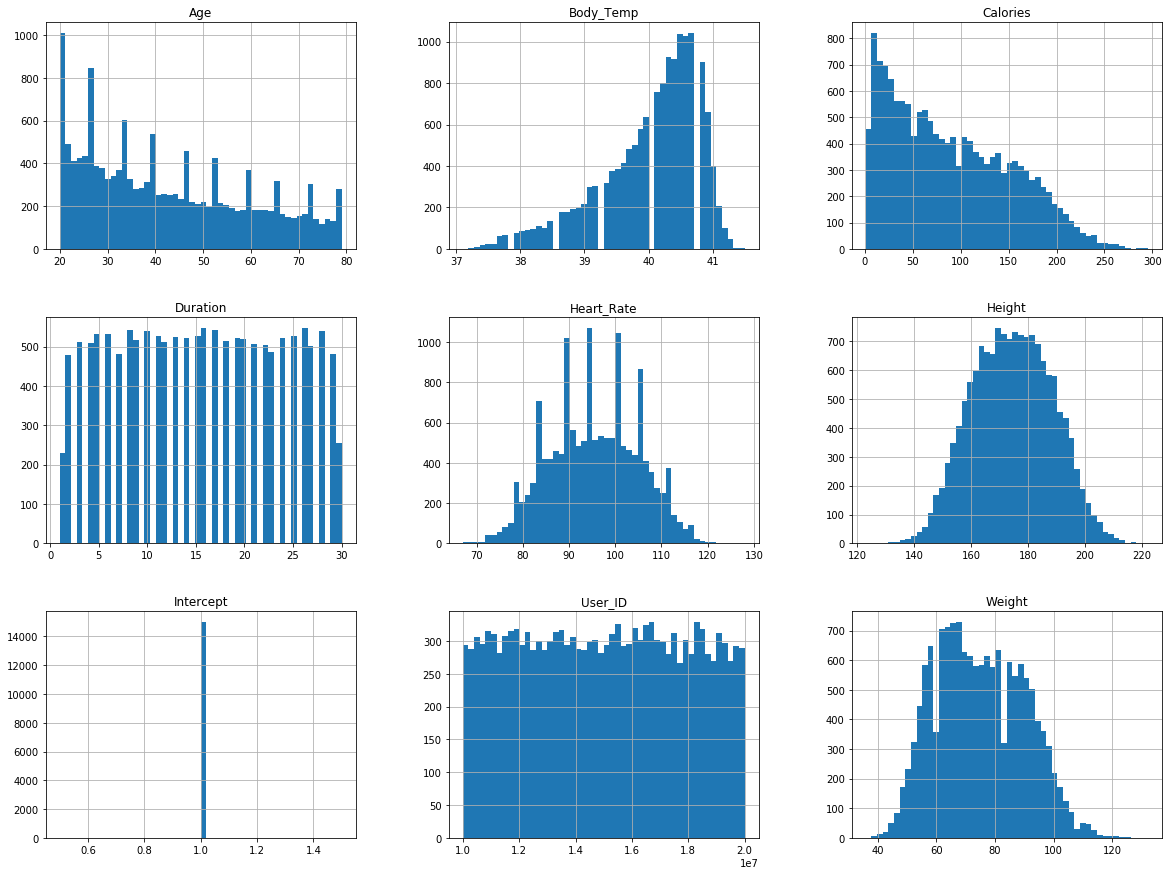

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

plt.show()

In [78]:
X = df.loc[:,['Intercept','Duration']]
y = df.loc[:,'Calories']

In [79]:
# X.head()
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

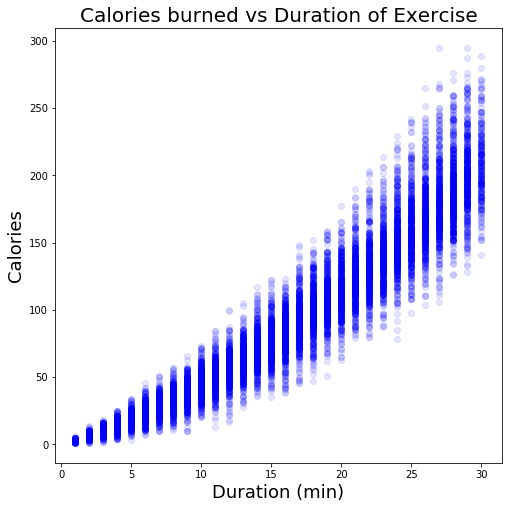

In [52]:

plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'bo',alpha=0.1);
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [84]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()

In [87]:
lr.fit(np.array(X.Duration).reshape(-1,1),y)

print(lr.intercept_)
print(lr.coef_[0])

-21.82810252605087
7.169783349587856
